In [1]:
%matplotlib inline

# Classification and Regression Trees

### Decision Tree Classifier
- Has max_depth as a hyperparameter.
- Divides the feature space into rectangular regions

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

wbc = pd.read_csv('dc_wbc.csv')

X = wbc[['radius_mean', 'concave points_mean']]
y = wbc[['diagnosis']]
y.replace({'M': 1, 'B': 0}, inplace=True)
SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

[1 0 0 1 0]
Test set accuracy: 0.89


/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:4531: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  limit=limit, regex=regex)


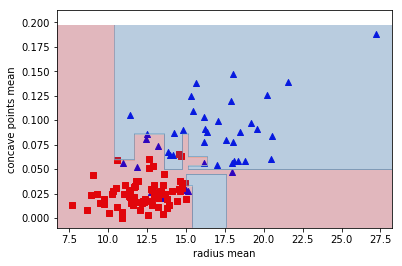

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X_test.loc[y_test['diagnosis']==1]['radius_mean'], X_test.loc[y_test['diagnosis']==1]['concave points_mean'], marker = '^', c='blue')
plt.scatter(X_test.loc[y_test['diagnosis']==0]['radius_mean'], X_test.loc[y_test['diagnosis']==0]['concave points_mean'], marker = 's', c='red')

plot_step = 0.001
x_min, x_max = X_test['radius_mean'].min() - 1, X_test['radius_mean'].max() + 1
y_min, y_max = X_test['concave points_mean'].min() - 0.01, X_test['concave points_mean'].max() + 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
plt.xlabel('radius mean')
plt.ylabel('concave points mean')
plt.show()

### Classification tree learning

Nodes are grown recursively. A node exists depending on the state of its predecessors.

At each node, split the data based on a feature and a split point criterion to maximize the information gained (can use entropy or gini index). The information gained depends on the "impurity" of each node involved.

If no energy is gained, it's a leaf/prediction.

In [36]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred_e = dt_entropy.predict(X_test)
y_pred_g = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_pred_e, y_test)
accuracy_gini = accuracy_score(y_pred_g, y_test)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.8947368421052632
Accuracy achieved by using the gini index:  0.8859649122807017


### Decision Tree Regression

For a regression tree, the impurity of a node is measured using the mean squared error of the targets in that node.

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression

auto = pd.read_csv('dc_auto-mpg2.csv')

X = auto.drop('mpg', axis=1)
X = pd.get_dummies(X)
y = auto[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)
lr = LinearRegression()

dt.fit(X_train, y_train)
lr.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_pred_lr = lr.predict(X_test)

mse_dt = MSE(y_test, y_pred)
mse_lr = MSE(y_test, y_pred_lr)

rmse_dt = mse_dt**(1/2)
rmse_lr = mse_lr**(1/2)

print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 3.82
Regression Tree test set RMSE: 4.44


# Bias vs Variance

Overfitting vs underfitting.

Find the balance between bias and variance that minimizes the Generalization Error.

High Variance:
- CV error greater than the training set error
- This mean's there's overfitting
- Decrease model complexity or gather more data

High Bias:
- CV error is much higher than desired error
- This means there's underfitting
- Increase model complexity or gather more features

In [80]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=1)

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

CV RMSE: 5.14
Train RMSE: 5.15


dt suffers from high bias, i.e., it's underfitting the data, because both errors are about the same, and too high.

### Ensemble Learning

Classification and Regression Trees (CARTs) are sensitive to small variations in the training set. They are vulnerable to high variance and may overfit, if unconstrained.

In Ensemble Learning, we train different models on the same data, then aggregate the predictions with a meta-model so that the final prediction result is more robust.

E.g. hard voting: each classifier used to train gets a "vote" and the final voting classifier predicts the result with the most votes.

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

liver = pd.read_csv('dc_indian_liver_patient_preprocessed.csv', index_col=0)
X = liver.drop('Liver_disease', axis=1)
y = liver[['Liver_disease']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

SEED=1

lr = LogisticRegression(random_state=SEED)
knn = KNN(n_neighbors=27)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

for clf_name, clf in classifiers:    
 
    clf.fit(X_train, np.ravel(y_train))  
   
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) 
   
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.764
K Nearest Neighbours : 0.701
Classification Tree : 0.730


In [93]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=classifiers)     

vc.fit(X_train, np.ravel(y_train))

y_pred = vc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.770


/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Bagging and Random Forests

### Bootstrap aggregation, or Bagging

In Bagging, you use one algorithm, but train on different subsets of the data (with replacement).  This reduces variance.

In classification, the final prediction is given by majority voting.

In regression, the final prediction is given by averaging.

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=1)

bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

bc.fit(X_train, np.ravel(y_train))

y_pred = bc.predict(X_test)

acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.73


### Out of Bag (OOB)

Include the samples not selected by bagging.

In [99]:
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)
bc.fit(X_train, np.ravel(y_train))

y_pred = bc.predict(X_test)

acc_test = accuracy_score(y_test, y_pred)

acc_oob = bc.oob_score_

print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.718, OOB accuracy: 0.684


### Random Forests

Each estimator is trained on a different bootstrapped sample having the same size as the training set.

A number of features *d* are sampled at each node (without replacement). The one that maximizes information gain is selected.

Aggregates predictions by majority voting.

In general, gets a lower variance than regular decision trees.

Feature importance can be accessed by extracting the `feature_importance_` attribute of the classifier after fitting.

In [104]:
from sklearn.ensemble import RandomForestRegressor

bikes = pd.read_csv('dc_bikes.csv')
X = bikes.drop('cnt', axis=1)
y = bikes[['cnt']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

rf = RandomForestRegressor(n_estimators=25, random_state=2)
              
rf.fit(X_train, np.ravel(y_train))

y_pred = rf.predict(X_test)

rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.11


Text(0.5,1,'Features Importances')

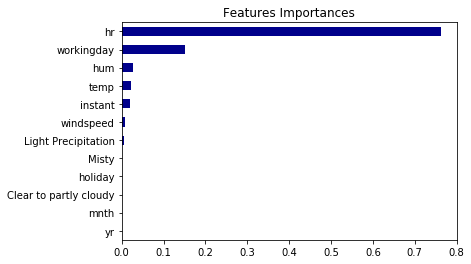

In [105]:
importances = pd.Series(data=rf.feature_importances_, index= X_train.columns)

importances_sorted = importances.sort_values()

importances_sorted.plot(kind='barh', color='darkblue')
plt.title('Features Importances')

# Boosting

Many weak learners are combined to form a strong learner. They are trained sequentially and each tries to correct the mistakes made by its predecessors.

*Adaboost*: (Adaptive Boosting)
- Each predictor pays more attention to instances wrongly predicted by its predecessor
- Change weights of training samples
- Each predictor has a coefficient $\alpha$ that depends on that predictor's training error.
- Learning rate $\eta$: Between 0 and 1, used to shrink the coefficient $\alpha$. Small value of $\eta$ requires a larger number of estimators.
- Classification: Majority voting, Regression: Weighted average.

In [133]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

X = liver.drop('Liver_disease', axis=1)
y = liver[['Liver_disease']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.13, random_state=1)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

ada.fit(X_train, np.ravel(y_train))

y_pred = ada.predict(X_test)
y_pred_proba = ada.predict_proba(X_test)[:,1]

ada_roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

ROC AUC score: 0.78
Test set accuracy of bc: 0.73


*Gradient Boosting*:
- Does not tweak the weights of training samples
- Each predictor is trained using its predecessors error as labels
- Shrinkage $\eta$: the prediction of each tree is shrunk by $\eta$. Tradeoff with number of estimators like in Adaboost

In [142]:
from sklearn.ensemble import GradientBoostingRegressor

bikes = pd.read_csv('dc_bikes.csv')
X = bikes.drop('cnt', axis=1)
y = bikes[['cnt']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

gb = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=2)

gb.fit(X_train, np.ravel(y_train))
y_pred = gb.predict(X_test)

rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 49.796


Gradient Boosting must execute an exhaustive search, which might repeat CARTs with same split points/features.

*Stochastic Gradient Boosting*:
- Each tree trained on a random subset of rows in the sample, without replacement
- Features are sampled without replacement when choosing split points
- Adds more variance to the ensemble of trees

In [143]:
sgbr = GradientBoostingRegressor(max_depth=4, 
                                 subsample=0.9,
                                 max_features=0.75,
                                 n_estimators=200,                                
                                 random_state=2)
sgbr.fit(X_train, np.ravel(y_train))
y_pred = sgbr.predict(X_test)

rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 47.454


# Tuning Hyperparameters

Grid Search:
- Set a metric for evaluating model performance
- Manually search through a grid of discrete hyperparameter values
- For each set of hyperparameters, get the model's CV score, pick the best

In [148]:
from sklearn.model_selection import GridSearchCV

X = liver.drop('Liver_disease', axis=1)
y = liver[['Liver_disease']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

dt = DecisionTreeClassifier(random_state=1)

params_dt = {'max_depth': [2,3,4],
             'min_samples_leaf': [0.12,0.14,0.16,0.18]
            }

grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

best_model = grid_dt.best_estimator_

y_pred_proba = best_model.predict_proba(X_test)[:,1]

test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

print('Best hyerparameters:\n', grid_dt.best_params_)

Test set ROC AUC score: 0.731
Best hyerparameters:
 {'max_depth': 3, 'min_samples_leaf': 0.14}


### Random Forest Hyperparameters:

- CART hyperparameters
- number of estimators
- bootstrapping

In [151]:
X = bikes.drop('cnt', axis=1)
y = bikes[['cnt']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

rf = RandomForestRegressor(random_state=1)

params_rf = {'n_estimators': [100,350,500],
             'max_features': ['log2','auto','sqrt'],
             'min_samples_leaf': [2,10,30]
            }
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, np.ravel(y_train))

best_model = grid_rf.best_estimator_

y_pred = best_model.predict(X_test)

rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

print('Best hyerparameters:\n', grid_rf.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    8.8s finished


Test RMSE of best model: 54.282
Best hyerparameters:
 {'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 500}
